In [2]:
pip install pandas matplotlib seaborn

           Enterprise_Size              Region  Turnover  Employees  \
19   Less than 10 employed   Region Syddanmark    169423      68221   
17   Less than 10 employed  Region Nordjylland     85125      34684   
16   Less than 10 employed  Region Midtjylland    195577      76136   
15   Less than 10 employed  Region Hovedstaden    252336     117070   
18   Less than 10 employed    Region Sjaelland     89633      45226   
0          10-49 employees  Region Hovedstaden    357456     144920   
4          10-49 employees   Region Syddanmark    222826      87204   
3          10-49 employees    Region Sjaelland     87003      46634   
2          10-49 employees  Region Nordjylland     94296      39969   
1          10-49 employees  Region Midtjylland    554933      97503   
10        50-249 employees  Region Hovedstaden    460982     160247   
11        50-249 employees  Region Midtjylland    593134      90488   
12        50-249 employees  Region Nordjylland    119025      40919   
13    

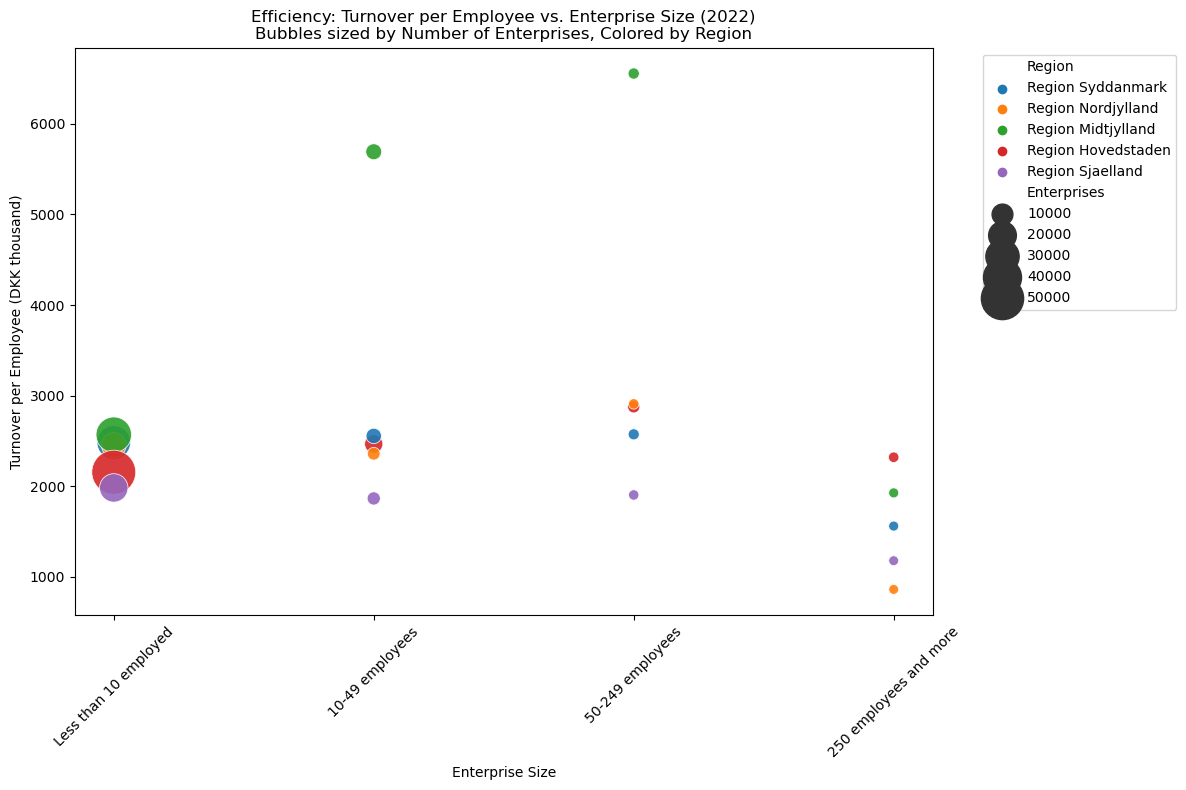

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = r"C:\Users\papad\Downloads\post.xlsx"
df = pd.read_excel(file_path, sheet_name='data')

# Filter for year 2023
df_2023 = df[df['Year'] == 2022]

# Exclude 'Total all enterprises' and 'All Denmark'
df_2023 = df_2023[(df_2023['Enterprise_Size'] != 'Total all enterprises') & 
                  (df_2023['Region'] != 'All Denmark') & 
                  (df_2023['Region'] != 'Region unknown')]

# Pivot to get employees, turnover, and enterprises in separate columns
pivot_df = df_2023.pivot_table(index=['Enterprise_Size', 'Region'], 
                               columns='Unit', 
                               values='Value', 
                               aggfunc='sum').reset_index()  # Use 'sum' to aggregate if multiple rows

# Rename columns for clarity
pivot_df.columns = ['Enterprise_Size', 'Region', 'Employees', 'Enterprises', 'Turnover']

# Calculate turnover per employee (Turnover in DKK million, Employees in full-time persons)
pivot_df['Turnover_per_Employee'] = pivot_df['Turnover'] / (pivot_df['Employees'] / 1000)  # Convert to thousand employees for DKK million/employee

# Define order for enterprise sizes
size_order = ['Less than 10 employed', '10-49 employees', '50-249 employees', '250 employees and more']
pivot_df['Size_Num'] = pivot_df['Enterprise_Size'].map({
    'Less than 10 employed': 1,
    '10-49 employees': 2,
    '50-249 employees': 3,
    '250 employees and more': 4
})

# Sort by size order
pivot_df = pivot_df.sort_values('Size_Num')

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pivot_df, 
                x='Size_Num', 
                y='Turnover_per_Employee', 
                hue='Region', 
                size='Enterprises', 
                sizes=(50, 1000),  # Scale bubble sizes
                alpha=0.9)

# Customize x-axis
plt.xticks([1, 2, 3, 4], size_order, rotation=45)

# Labels and title
plt.xlabel('Enterprise Size')
plt.ylabel('Turnover per Employee (DKK thousand)')
plt.title('Efficiency: Turnover per Employee vs. Enterprise Size (2022)\nBubbles sized by Number of Enterprises, Colored by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a PNG in the Downloads folder
plt.savefig(r"C:\Users\papad\Downloads\efficiency_scatter_plot22.png", dpi=300, bbox_inches='tight')


# Show plot and print data for verification
print(pivot_df[['Enterprise_Size', 'Region', 'Turnover', 'Employees', 'Turnover_per_Employee']])
plt.tight_layout()
plt.show()